In [12]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [24]:
# Read the CSV file :
data = pd.read_csv(r'Fuel.csv')
data.head(100)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014,BMW,435i COUPE,COMPACT,3.0,6,M6,Z,11.8,7.9,10.0,28,230
96,2014,BMW,435i xDRIVE COUPE,COMPACT,3.0,6,A8,Z,11.7,7.8,9.9,29,228
97,2014,BMW,435i xDRIVE COUPE,COMPACT,3.0,6,M6,Z,11.9,8.3,10.3,27,237
98,2014,BMW,528i,MID-SIZE,2.0,4,A8,Z,10.2,7.0,8.8,32,202


In [14]:
# Let’s select some features to explore more :
# data = data[['ENGINESIZE','CO2EMISSIONS']]
data = data[['FUELCONSUMPTION_COMB','CO2EMISSIONS']]
data.head()

,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,8.5,196
1,9.6,221
2,5.9,136
3,11.1,255
4,10.6,244


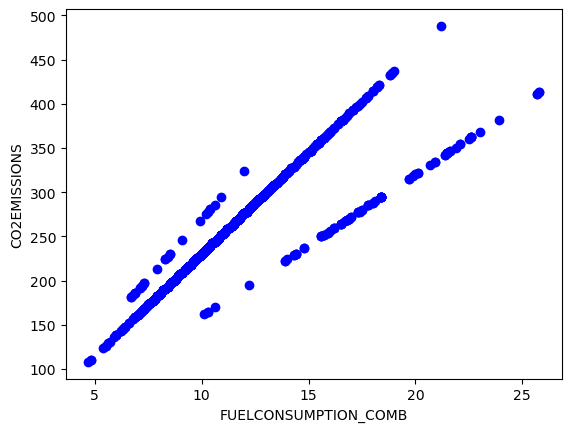

In [15]:
# ENGINESIZE vs CO2EMISSIONS:
plt.scatter(data['FUELCONSUMPTION_COMB'] , data['CO2EMISSIONS'] ,
color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [16]:
# Generating training and testing data from our data:
# We are using 80% data for training.
# first train 80% of the beginning of the data
# test the 20% of the last remaining data
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]
print(train)
print (test)

     FUELCONSUMPTION_COMB  CO2EMISSIONS
0                     8.5           196
1                     9.6           221
2                     5.9           136
3                    11.1           255
4                    10.6           244
..                    ...           ...
848                  10.9           251
849                  11.8           271
850                   9.3           214
851                  10.6           244
852                  11.0           253

[853 rows x 2 columns]
      FUELCONSUMPTION_COMB  CO2EMISSIONS
853                    8.8           202
854                   11.1           255
855                    8.3           191
856                    8.6           198
857                    7.0           161
...                    ...           ...
1062                  11.8           271
1063                  11.5           264
1064                  11.8           271
1065                  11.3           260
1066                  12.8           294

[21

In [17]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[['FUELCONSUMPTION_COMB']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
# The coefficients:
print ('coefficients : ',regr.coef_) #Slope
print ('Intercept : ',regr.intercept_) #Intercept

coefficients :  [[15.62172419]]
Intercept :  [74.53778766]


Text(0, 0.5, 'Emission')

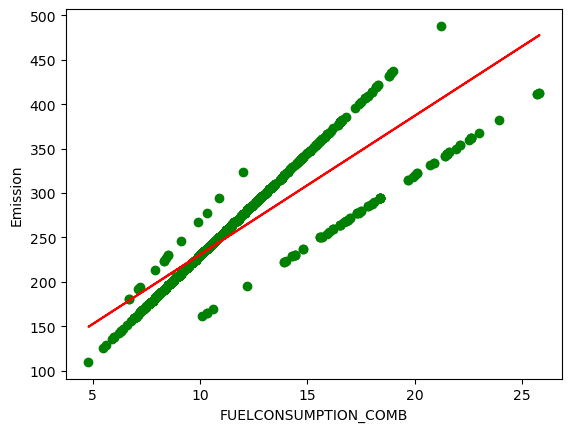

In [18]:
# Plotting the regression line:
plt.scatter(train['FUELCONSUMPTION_COMB'], train['CO2EMISSIONS'],
color='green')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')

In [19]:
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

In [20]:
# Predicting emission for future car:
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ('Estimated Emission :',estimatd_emission)

Estimated Emission : 129.21382233132397


In [21]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['FUELCONSUMPTION_COMB']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
# print (test_y_)

In [22]:
print("Mean absolute error (MAE): %.2f" %np.mean(np.absolute(test_y_ - test_y)))
print("Mean squared error (MSE): %.2f" %np.mean((test_y_ - test_y) ** 2))
print("R2-score (Coefficient of Determination):%.2f" % r2_score(test_y_ , test_y) )

Mean absolute error (MAE): 15.92
Mean squared error (MSE): 461.98
R2-score (Coefficient of Determination):0.74
